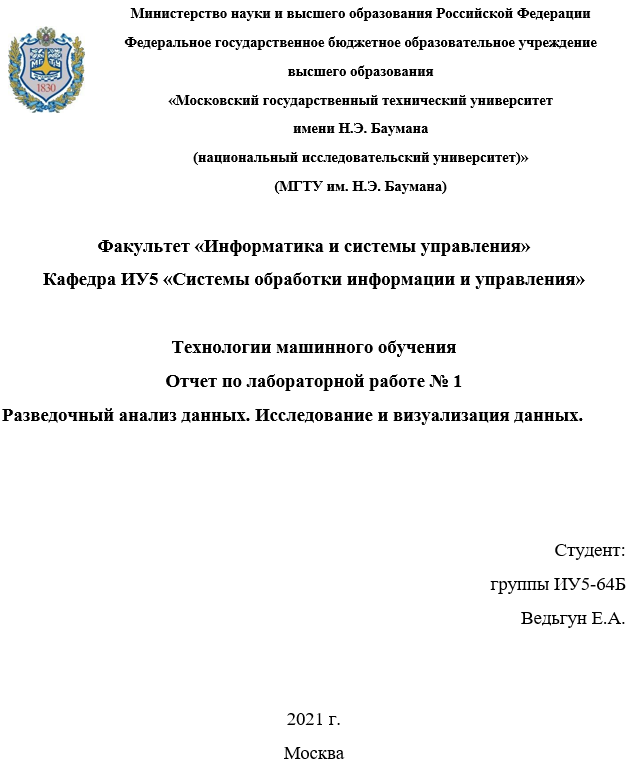

# 1)Текстовое описание набора данных


В качестве набора данных мы будем использовать набор данных по распознаванию качества красных вин:

https://www.kaggle.com/sgus1318/winedata

#### Датасет состоит из одного файла:
'winequality_red.csv'
#### Файл содержит следующие колонки:
1. fixed acidity  —  фиксированная кислотность 
2. volatile acidity  —   летучая кислотность
3. citric acid  —  лимонная кислота 
4. residual sugar  —  остаточный сахар
5. chlorides  —  хлориды
6. free sulfur dioxide  —  свободный диоксид серы 
7. total sulfur dioxide  —  общая двуокись серы 
8. density  —  плотность 
9. pH  —  потенциал водорода 
10. sulphates  —  сульфаты 
11. alcohol  —  алкоголь 
12. quality  —  качество алкоголя (выходной параметр) 

## Импорт библиотек

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

In [94]:
data = pd.read_csv('data/winequality_red.csv', sep=",")

# 2) Основные характеристики датасета

In [95]:
# Первые 5 строк датасета
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
# Размер датасета - 1599 строк, 12 колонок
data.shape

(1599, 12)

In [97]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1599


In [98]:
# Список колонок
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [99]:
# Список колонок с типами данных
data.dtypes

fixed acidity       float64
volatile acidity    float64
                     ...   
alcohol             float64
quality               int64
Length: 12, dtype: object

In [100]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0


In [101]:
# Основные статистические характеристки набора данных
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
...,...,...,...,...,...,...,...,...,...,...,...,...
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 3) Визуальное исследование датасета
### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

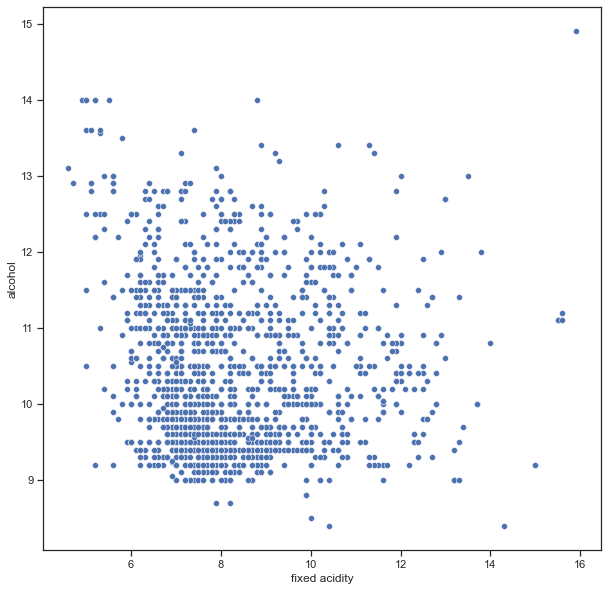

In [106]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='fixed acidity', y='alcohol', data=data)

Посмотрим как зависит качество алкоголя от его крепости и фиксированной кислотности

<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

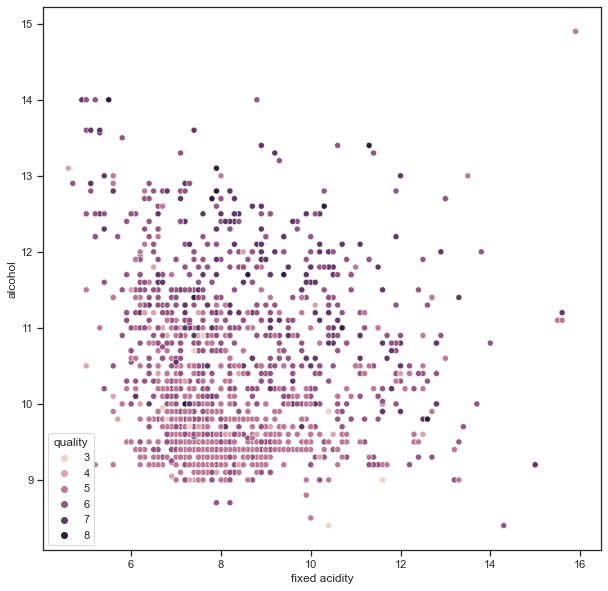

In [108]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='fixed acidity', y='alcohol', data=data, hue="quality")

### Гистограмма
Позволяет оценить плотность вероятности распределения данных. Рассмотрим плотность распределения pH:

C:\Users\mi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

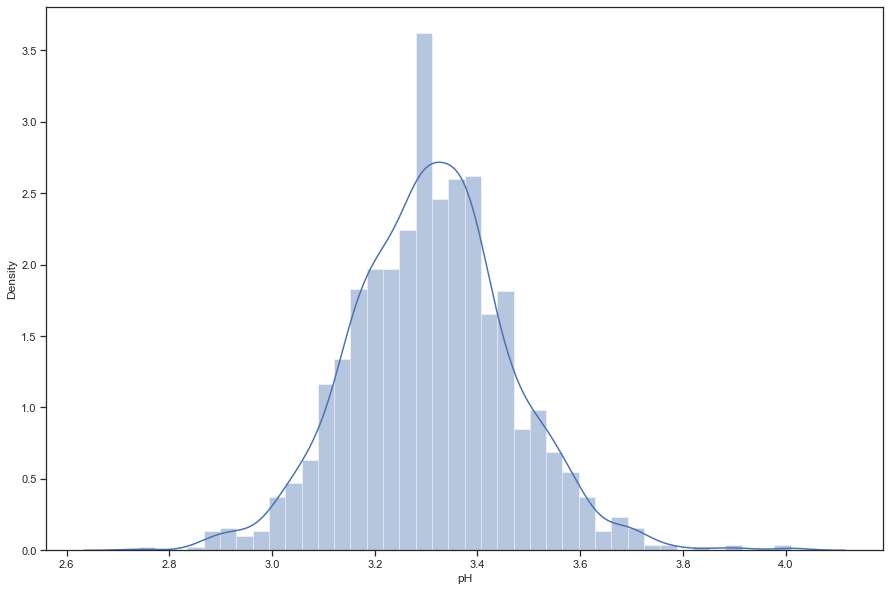

In [112]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.distplot(data['pH'])

### Joinplot
Комбинация гистограмм и диаграмм рассеивания.

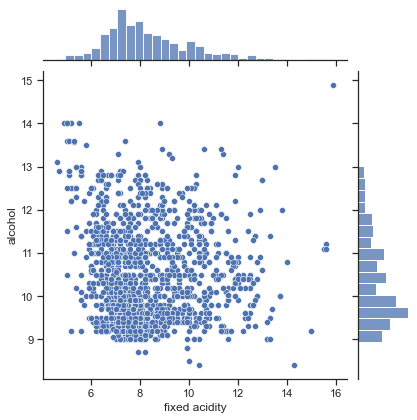

In [113]:
sns.jointplot(x='fixed acidity', y='alcohol', data=data)

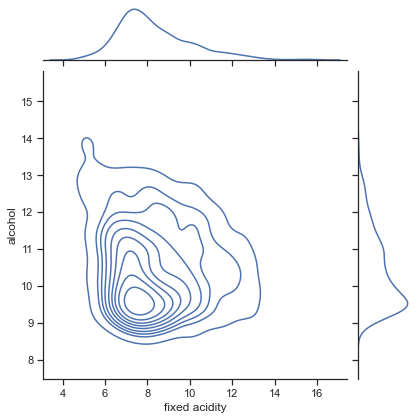

In [115]:
sns.jointplot(x='fixed acidity', y='alcohol', data=data, kind="kde")

### Парные диаграммы
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

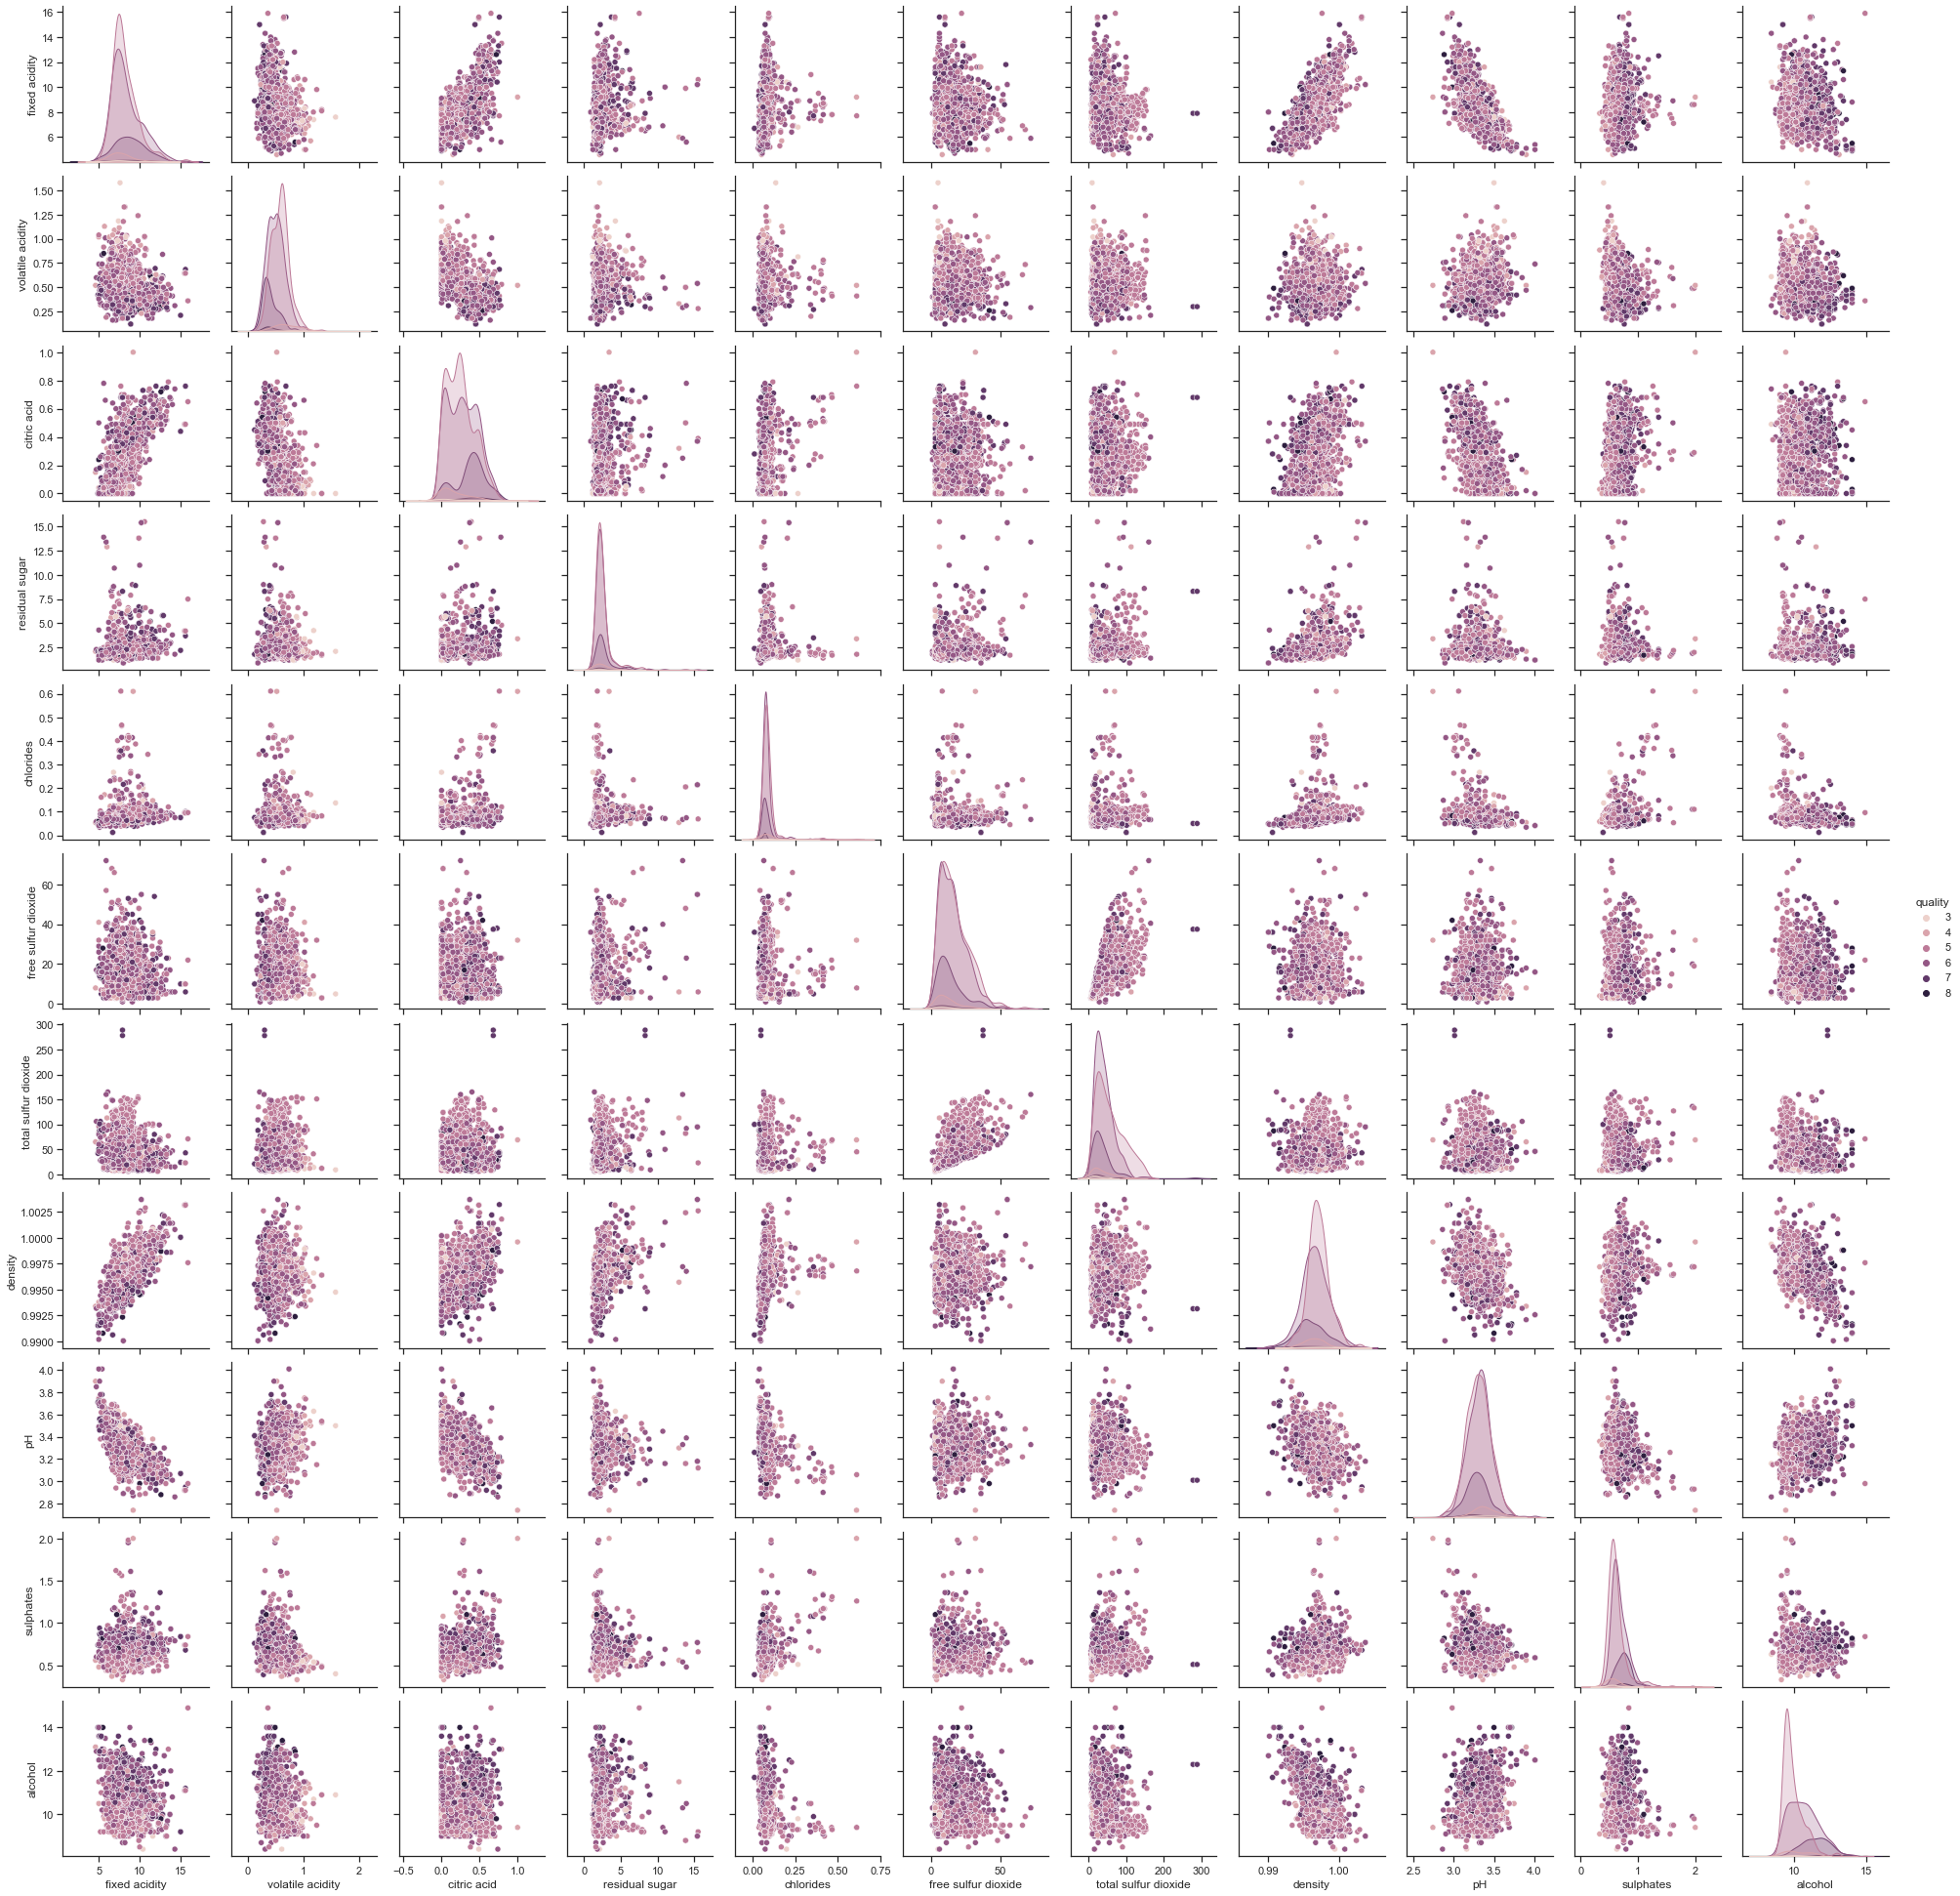

In [117]:
sns.pairplot(data, hue='quality')

### Ящик с усами
Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='alcohol'>

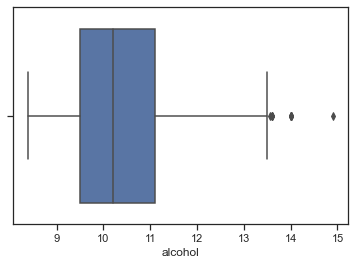

In [119]:
sns.boxplot(x=data['alcohol'])

<AxesSubplot:ylabel='alcohol'>

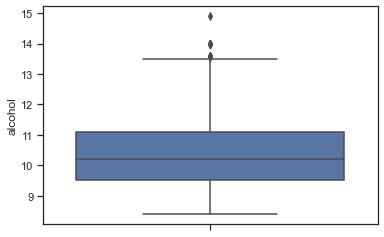

In [120]:
sns.boxplot(y=data['alcohol'])

### Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

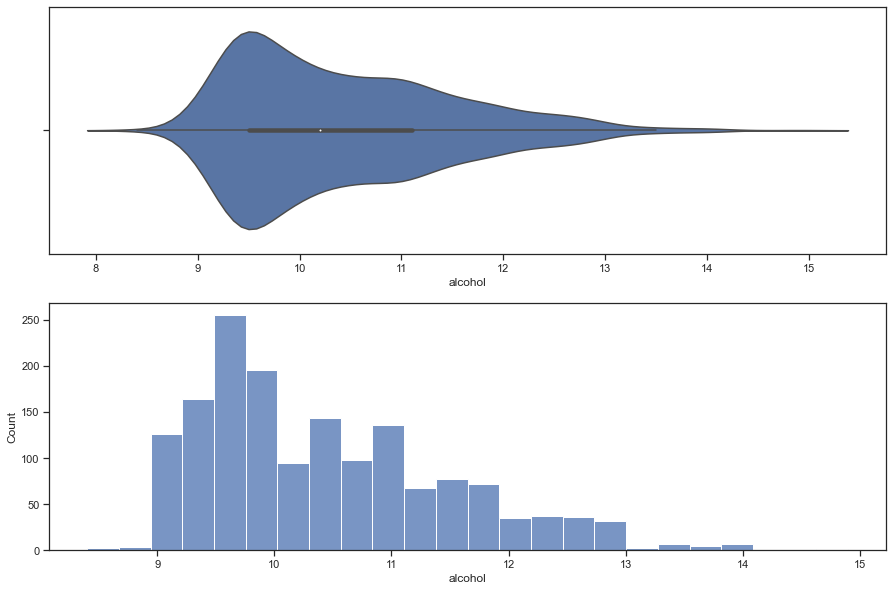

In [122]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
sns.violinplot(ax=ax[0], x=data['alcohol'])
sns.histplot(data['alcohol'], ax=ax[1])

### Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

- Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "quality"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
- Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [123]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
...,...,...,...,...,...,...,...,...,...,...,...,...
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166
quality,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166,1.000000


Целевой признак наиболее сильно коррелирует с содержанием алкоголя (0.47) и концентрацией сульфатов (0.25). Эти признаки обязательно следует оставить в модели.

### Heatmap
Показывает степень корреляции различными цветами.

<AxesSubplot:>

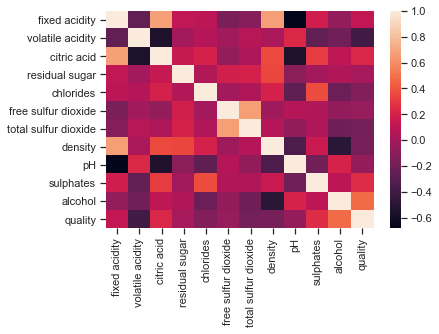

In [124]:
sns.heatmap(data.corr())

<AxesSubplot:>

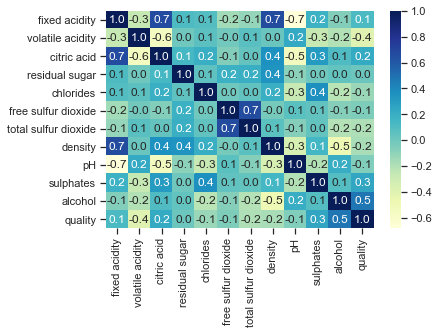

In [128]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.1f')

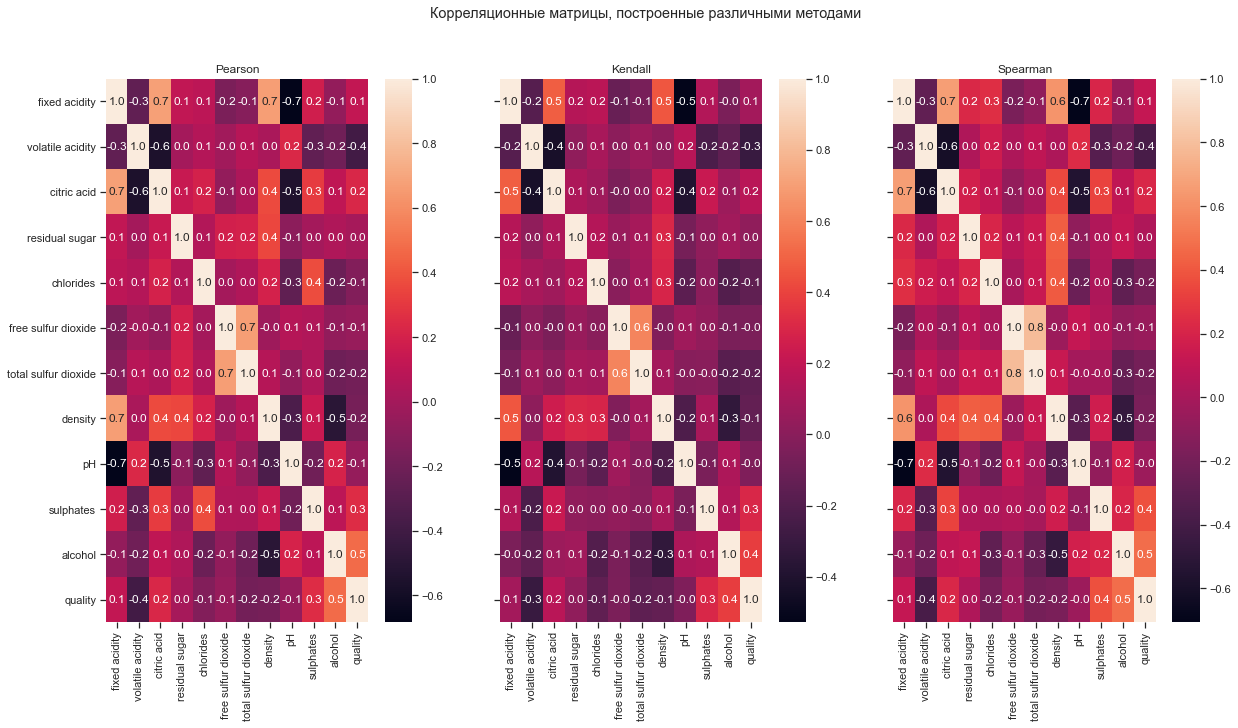

In [134]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')